<a href="https://colab.research.google.com/github/MPGarg/Assignment-13/blob/main/EVA8_Assigment_13_Part_2_CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
from __future__ import print_function
import torch.optim as optim
from torchvision import datasets, transforms
import torch
import torch.nn.functional as F
import torchvision
#from torchsummary import summary
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
#!pip install -U albumentations
!pip install torch_lr_finder -q
import albumentations as A
from albumentations.pytorch import ToTensorV2
from torch_lr_finder import LRFinder

/usr/local/lib/python3.10/dist-packages/torch_lr_finder/lr_finder.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


# Import files from GIT Hub

In [3]:
!git clone https://github.com/RashiTech/main_repo.git

Cloning into 'main_repo'...
remote: Enumerating objects: 167, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 167 (delta 8), reused 0 (delta 0), pack-reused 148
Receiving objects: 100% (167/167), 48.80 KiB | 6.10 MiB/s, done.
Resolving deltas: 100% (90/90), done.


# VAE class is imported

In [4]:
from main_repo.models import vae
from main_repo.models.vae import cVAE

# Import Other fuctions

In [5]:
from main_repo import train_test, utils
from main_repo.utils import *
from main_repo.train_test import *

# Assign device

In [6]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [7]:
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary

[INFO] Couldn't find torchinfo... installing it.


In [8]:
from torchsummary import summary
view_model = cVAE((3, 32, 32), 10, nhid = 2, ncond = 16,device=device).to(device)
#summary(view_model, input_size=(1,28,28))
view_model

cVAE(
  (encoder): Encoder(
    (encode): Sequential(
      (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
      (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
      (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (7): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
      (8): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (9): ReLU(inplace=True)
      (10): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
      (11): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (12): ReLU(inplace=True)
      (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (14): Flatten()
      (15): MLP(
    

# Dataset

In [13]:
# Download Cifar10 data
train_set_cifar = torchvision.datasets.CIFAR10(
    root='./data'
    ,train=True
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

test_set_cifar = torchvision.datasets.CIFAR10(
    root='./data'
    ,train=False
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

Files already downloaded and verified
Files already downloaded and verified


In [14]:
from torch.utils.data import Dataset
class cifar_ds(Dataset):
  def __init__(self, imageset):
    self.imageset = imageset

  def __getitem__(self, index):

    image = self.imageset[index][0]
    label = self.imageset[index][1]

    if np.random.randn() > 0.5:
        label = np.random.randint(0,10)

    return image, label

  def __len__(self):
    return len(self.imageset)

In [15]:
#Instantiate Train & test classes
cifar_train = cifar_ds(train_set_cifar)
cifar_test = cifar_ds(test_set_cifar)

In [16]:
train_loader = torch.utils.data.DataLoader(
    cifar_train,
    batch_size=128, shuffle=True)
test_loader = torch.utils.data.DataLoader(
    cifar_test,
    batch_size=25)

# VAE

In [19]:
learning_rate = 0.001
model = cVAE((3, 32, 32), 10, nhid = 16, ncond = 16,device=device).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.BCELoss(reduction = "sum")

In [31]:
model_tr1, train_losses1 = fit_model_vae(
                                          model=model,
                                          device=device,
                                          trainloader=train_loader,
                                          criterion = criterion,
                                          EPOCHS=100,
                                          optimizer=optimizer,
                                          scheduler=None
                                            )


EPOCH: 1 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 20.32it/s]



Average Training Loss=1850.994140625

EPOCH: 2 (LR: 0.001)


100%|██████████| 391/391 [00:18<00:00, 21.35it/s]



Average Training Loss=1850.9447603125

EPOCH: 3 (LR: 0.001)


100%|██████████| 391/391 [00:20<00:00, 18.69it/s]



Average Training Loss=1850.2052721875

EPOCH: 4 (LR: 0.001)


100%|██████████| 391/391 [00:20<00:00, 19.37it/s]



Average Training Loss=1850.070933125

EPOCH: 5 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 20.45it/s]



Average Training Loss=1849.745070625

EPOCH: 6 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 19.84it/s]



Average Training Loss=1849.956355625

EPOCH: 7 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 20.51it/s]



Average Training Loss=1849.2038009375

EPOCH: 8 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 20.41it/s]



Average Training Loss=1849.6419640625

EPOCH: 9 (LR: 0.001)


100%|██████████| 391/391 [00:20<00:00, 19.31it/s]



Average Training Loss=1848.9104915625

EPOCH: 10 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 20.16it/s]



Average Training Loss=1848.659344375

EPOCH: 11 (LR: 0.001)


100%|██████████| 391/391 [00:18<00:00, 21.26it/s]



Average Training Loss=1848.584271875

EPOCH: 12 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 20.19it/s]



Average Training Loss=1848.634305625

EPOCH: 13 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 19.74it/s]



Average Training Loss=1848.6790671875

EPOCH: 14 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 20.45it/s]



Average Training Loss=1847.9324140625

EPOCH: 15 (LR: 0.001)


100%|██████████| 391/391 [00:18<00:00, 20.83it/s]



Average Training Loss=1848.04961875

EPOCH: 16 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 20.40it/s]



Average Training Loss=1847.753569375

EPOCH: 17 (LR: 0.001)


100%|██████████| 391/391 [00:18<00:00, 20.69it/s]



Average Training Loss=1847.9316665625

EPOCH: 18 (LR: 0.001)


100%|██████████| 391/391 [00:18<00:00, 20.77it/s]



Average Training Loss=1847.2700015625

EPOCH: 19 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 20.16it/s]



Average Training Loss=1846.9456278125

EPOCH: 20 (LR: 0.001)


100%|██████████| 391/391 [00:18<00:00, 21.11it/s]



Average Training Loss=1846.823369375

EPOCH: 21 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 20.37it/s]



Average Training Loss=1847.21807875

EPOCH: 22 (LR: 0.001)


100%|██████████| 391/391 [00:18<00:00, 21.04it/s]



Average Training Loss=1846.94037

EPOCH: 23 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 20.17it/s]



Average Training Loss=1846.755193125

EPOCH: 24 (LR: 0.001)


100%|██████████| 391/391 [00:18<00:00, 21.31it/s]



Average Training Loss=1846.845215625

EPOCH: 25 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 20.13it/s]



Average Training Loss=1846.3187553125

EPOCH: 26 (LR: 0.001)


100%|██████████| 391/391 [00:18<00:00, 21.03it/s]



Average Training Loss=1846.2828075

EPOCH: 27 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 20.36it/s]



Average Training Loss=1846.17506125

EPOCH: 28 (LR: 0.001)


100%|██████████| 391/391 [00:18<00:00, 21.33it/s]



Average Training Loss=1846.0539315625

EPOCH: 29 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 20.15it/s]



Average Training Loss=1845.731831875

EPOCH: 30 (LR: 0.001)


100%|██████████| 391/391 [00:18<00:00, 21.09it/s]



Average Training Loss=1845.7429796875

EPOCH: 31 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 20.38it/s]



Average Training Loss=1845.576824375

EPOCH: 32 (LR: 0.001)


100%|██████████| 391/391 [00:18<00:00, 20.94it/s]



Average Training Loss=1845.35602375

EPOCH: 33 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 20.53it/s]



Average Training Loss=1845.466621875

EPOCH: 34 (LR: 0.001)


100%|██████████| 391/391 [00:18<00:00, 21.34it/s]



Average Training Loss=1845.3436746875

EPOCH: 35 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 20.33it/s]



Average Training Loss=1845.050913125

EPOCH: 36 (LR: 0.001)


100%|██████████| 391/391 [00:18<00:00, 20.87it/s]



Average Training Loss=1845.1864421875

EPOCH: 37 (LR: 0.001)


100%|██████████| 391/391 [00:18<00:00, 20.72it/s]



Average Training Loss=1845.0478253125

EPOCH: 38 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 20.35it/s]



Average Training Loss=1844.952185625

EPOCH: 39 (LR: 0.001)


100%|██████████| 391/391 [00:18<00:00, 20.81it/s]



Average Training Loss=1844.861720625

EPOCH: 40 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 19.99it/s]



Average Training Loss=1844.4551696875

EPOCH: 41 (LR: 0.001)


100%|██████████| 391/391 [00:18<00:00, 21.10it/s]



Average Training Loss=1844.5358528125

EPOCH: 42 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 20.51it/s]



Average Training Loss=1844.30513125

EPOCH: 43 (LR: 0.001)


100%|██████████| 391/391 [00:18<00:00, 21.39it/s]



Average Training Loss=1844.448216875

EPOCH: 44 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 20.49it/s]



Average Training Loss=1844.14713125

EPOCH: 45 (LR: 0.001)


100%|██████████| 391/391 [00:18<00:00, 21.21it/s]



Average Training Loss=1844.419155625

EPOCH: 46 (LR: 0.001)


100%|██████████| 391/391 [00:18<00:00, 20.77it/s]



Average Training Loss=1844.1311190625

EPOCH: 47 (LR: 0.001)


100%|██████████| 391/391 [00:18<00:00, 21.68it/s]



Average Training Loss=1844.0681471875

EPOCH: 48 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 20.55it/s]



Average Training Loss=1843.98831625

EPOCH: 49 (LR: 0.001)


100%|██████████| 391/391 [00:18<00:00, 21.30it/s]



Average Training Loss=1843.7972315625

EPOCH: 50 (LR: 0.001)


100%|██████████| 391/391 [00:18<00:00, 20.60it/s]



Average Training Loss=1844.119335625

EPOCH: 51 (LR: 0.001)


100%|██████████| 391/391 [00:18<00:00, 21.26it/s]



Average Training Loss=1843.67617

EPOCH: 52 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 20.48it/s]



Average Training Loss=1843.6005928125

EPOCH: 53 (LR: 0.001)


100%|██████████| 391/391 [00:18<00:00, 21.35it/s]



Average Training Loss=1843.6020696875

EPOCH: 54 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 20.40it/s]



Average Training Loss=1843.6702846875

EPOCH: 55 (LR: 0.001)


100%|██████████| 391/391 [00:18<00:00, 21.34it/s]



Average Training Loss=1843.625635625

EPOCH: 56 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 20.22it/s]



Average Training Loss=1843.4416128125

EPOCH: 57 (LR: 0.001)


100%|██████████| 391/391 [00:18<00:00, 21.30it/s]



Average Training Loss=1843.53052

EPOCH: 58 (LR: 0.001)


100%|██████████| 391/391 [00:18<00:00, 20.68it/s]



Average Training Loss=1843.3485503125

EPOCH: 59 (LR: 0.001)


100%|██████████| 391/391 [00:18<00:00, 21.38it/s]



Average Training Loss=1843.097449375

EPOCH: 60 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 20.47it/s]



Average Training Loss=1843.213831875

EPOCH: 61 (LR: 0.001)


100%|██████████| 391/391 [00:18<00:00, 21.23it/s]



Average Training Loss=1843.3517996875

EPOCH: 62 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 20.45it/s]



Average Training Loss=1843.0839378125

EPOCH: 63 (LR: 0.001)


100%|██████████| 391/391 [00:18<00:00, 21.41it/s]



Average Training Loss=1843.2314696875

EPOCH: 64 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 20.55it/s]



Average Training Loss=1842.98502875

EPOCH: 65 (LR: 0.001)


100%|██████████| 391/391 [00:18<00:00, 21.56it/s]



Average Training Loss=1842.979613125

EPOCH: 66 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 20.16it/s]



Average Training Loss=1842.7935978125

EPOCH: 67 (LR: 0.001)


100%|██████████| 391/391 [00:18<00:00, 20.80it/s]



Average Training Loss=1842.804108125

EPOCH: 68 (LR: 0.001)


100%|██████████| 391/391 [00:18<00:00, 20.84it/s]



Average Training Loss=1842.242516875

EPOCH: 69 (LR: 0.001)


100%|██████████| 391/391 [00:18<00:00, 21.06it/s]



Average Training Loss=1842.5121478125

EPOCH: 70 (LR: 0.001)


100%|██████████| 391/391 [00:18<00:00, 20.60it/s]



Average Training Loss=1842.450194375

EPOCH: 71 (LR: 0.001)


100%|██████████| 391/391 [00:18<00:00, 20.90it/s]



Average Training Loss=1842.562251875

EPOCH: 72 (LR: 0.001)


100%|██████████| 391/391 [00:18<00:00, 20.99it/s]



Average Training Loss=1842.3617159375

EPOCH: 73 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 20.53it/s]



Average Training Loss=1842.3864846875

EPOCH: 74 (LR: 0.001)


100%|██████████| 391/391 [00:18<00:00, 21.17it/s]



Average Training Loss=1842.2779128125

EPOCH: 75 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 20.57it/s]



Average Training Loss=1842.1256259375

EPOCH: 76 (LR: 0.001)


100%|██████████| 391/391 [00:18<00:00, 21.28it/s]



Average Training Loss=1842.0313496875

EPOCH: 77 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 20.38it/s]



Average Training Loss=1842.070213125

EPOCH: 78 (LR: 0.001)


100%|██████████| 391/391 [00:18<00:00, 21.47it/s]



Average Training Loss=1842.1392253125

EPOCH: 79 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 20.50it/s]



Average Training Loss=1842.12206875

EPOCH: 80 (LR: 0.001)


100%|██████████| 391/391 [00:18<00:00, 21.29it/s]



Average Training Loss=1842.09181

EPOCH: 81 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 20.57it/s]



Average Training Loss=1841.9889825

EPOCH: 82 (LR: 0.001)


100%|██████████| 391/391 [00:18<00:00, 21.35it/s]



Average Training Loss=1841.8495909375

EPOCH: 83 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 20.02it/s]



Average Training Loss=1841.85862125

EPOCH: 84 (LR: 0.001)


100%|██████████| 391/391 [00:18<00:00, 21.31it/s]



Average Training Loss=1841.72958125

EPOCH: 85 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 20.42it/s]



Average Training Loss=1841.737028125

EPOCH: 86 (LR: 0.001)


100%|██████████| 391/391 [00:18<00:00, 20.84it/s]



Average Training Loss=1841.906440625

EPOCH: 87 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 20.28it/s]



Average Training Loss=1841.658143125

EPOCH: 88 (LR: 0.001)


100%|██████████| 391/391 [00:18<00:00, 21.36it/s]



Average Training Loss=1841.56710875

EPOCH: 89 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 20.38it/s]



Average Training Loss=1841.695264375

EPOCH: 90 (LR: 0.001)


100%|██████████| 391/391 [00:18<00:00, 21.44it/s]



Average Training Loss=1841.6330384375

EPOCH: 91 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 20.53it/s]



Average Training Loss=1841.506275

EPOCH: 92 (LR: 0.001)


100%|██████████| 391/391 [00:18<00:00, 21.06it/s]



Average Training Loss=1841.6057753125

EPOCH: 93 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 20.22it/s]



Average Training Loss=1841.4967275

EPOCH: 94 (LR: 0.001)


100%|██████████| 391/391 [00:18<00:00, 21.28it/s]



Average Training Loss=1841.2795703125

EPOCH: 95 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 20.25it/s]



Average Training Loss=1841.2549215625

EPOCH: 96 (LR: 0.001)


100%|██████████| 391/391 [00:18<00:00, 21.24it/s]



Average Training Loss=1841.2105434375

EPOCH: 97 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 20.39it/s]



Average Training Loss=1841.1481884375

EPOCH: 98 (LR: 0.001)


100%|██████████| 391/391 [00:18<00:00, 21.28it/s]



Average Training Loss=1841.4153978125

EPOCH: 99 (LR: 0.001)


100%|██████████| 391/391 [00:19<00:00, 20.27it/s]



Average Training Loss=1841.0114603125

EPOCH: 100 (LR: 0.001)


100%|██████████| 391/391 [00:18<00:00, 21.27it/s]


Average Training Loss=1841.0043396875


# Generate Image

In [32]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
number = 1
with torch.no_grad():
    x = model.generate(number)

In [33]:
from matplotlib import pyplot as plt
from matplotlib import cm

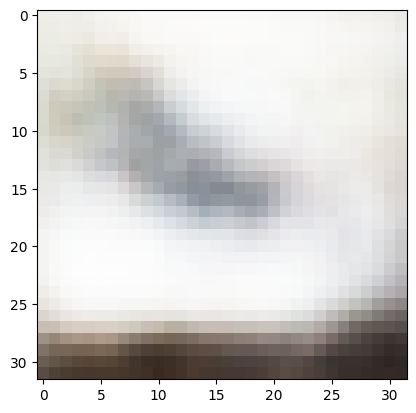

In [34]:
plt.imshow(np.transpose(x.squeeze(0).cpu().numpy(), (1, 2, 0)))

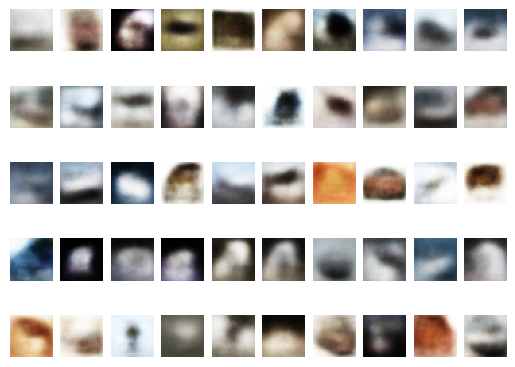

In [35]:
with torch.no_grad():
    x = model.generate(torch.tensor([list(range(10))] * 5).clone().view(-1))

for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.axis("off")
    plt.imshow(np.transpose(x[i].squeeze(0).cpu().numpy(), (1, 2, 0)))

# Incorrect Labels

In [36]:
dataiter = iter(train_loader)
data_next = next(dataiter)
images, labels = data_next

In [37]:
labels_1 = []
for i in labels:
    incorrect_label = torch.randint(low=0, high=10, size=(1,)).item()
    while incorrect_label == i:
        incorrect_label = torch.randint(low=0, high=10, size=(1,)).item()
    labels_1.append(incorrect_label)

In [38]:
labels_c = torch.IntTensor(labels_1)
images, labels_c = images.to(device), labels_c.to(device)
labels = labels.to(device)
with torch.no_grad():
    X_hat1, _,_ = model(images, labels)

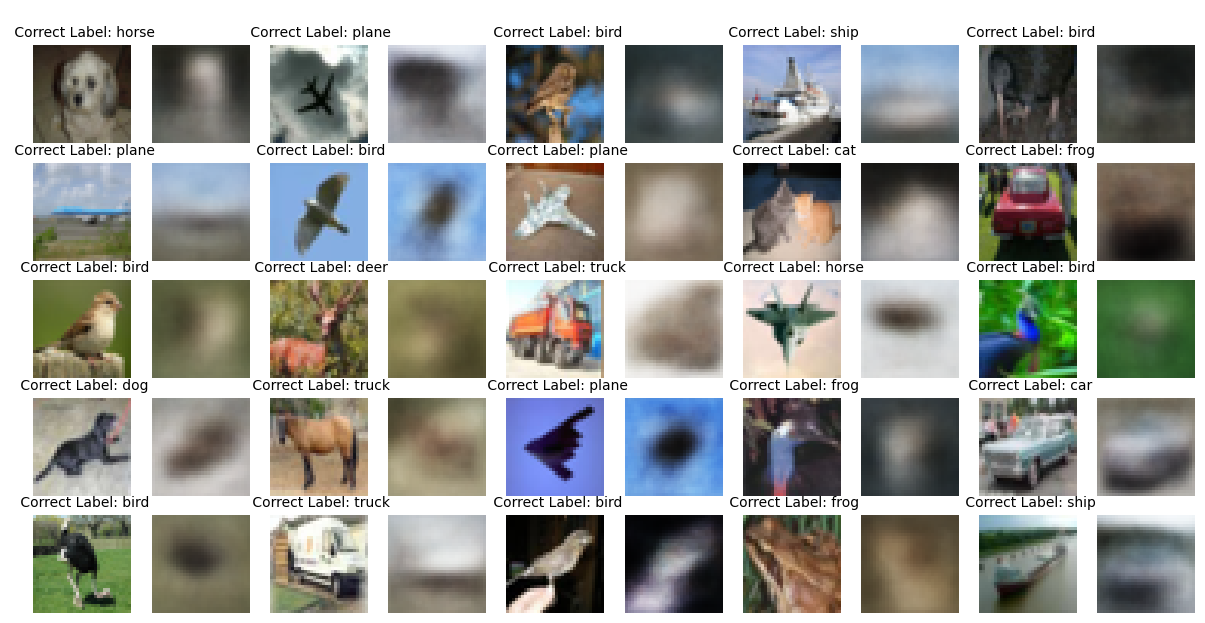

In [39]:
j = 0
fig = plt.figure(figsize=(15,15))
for i in range(25):
    lbl_corr = labels[i]
    img_corr = images[i]
    img_new = X_hat1[i]
    lbl_new = labels[i]
    j = j+1
    ax = fig.add_subplot(10, 10,j )
    ax.axis("off")
    ax.imshow(np.transpose(img_corr.squeeze(0).cpu().numpy(), (1, 2, 0)))
    ax.set_title(f'\n Correct Label: {classes[lbl_new.detach()]}',fontsize=10)
    j = j+1
    ax = fig.add_subplot(10, 10, j)
    ax.axis("off")
    ax.imshow(np.transpose(img_new.squeeze(0).cpu().detach().numpy(), (1, 2, 0)))

In [40]:
labels_c = torch.IntTensor(labels_1)
images, labels_c = images.to(device), labels_c.to(device)
labels = labels.to(device)
with torch.no_grad():
    X_hat1, _,_ = model(images, labels_c)

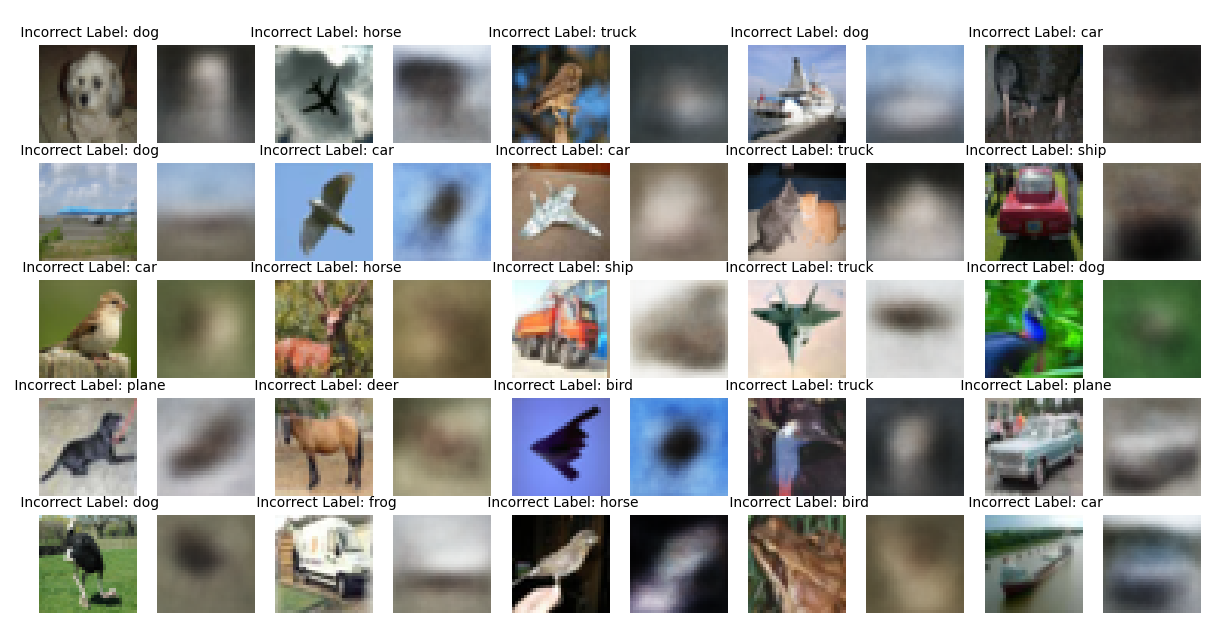

In [41]:
j = 0
fig = plt.figure(figsize=(15,15))
for i in range(25):
    lbl_corr = labels[i]
    img_corr = images[i]
    img_new = X_hat1[i]
    lbl_new = labels_c[i]
    j = j+1
    ax = fig.add_subplot(10, 10,j )
    ax.axis("off")
    ax.imshow(np.transpose(img_corr.squeeze(0).cpu().numpy(), (1, 2, 0)))
    ax.set_title(f'\n Incorrect Label: {classes[lbl_new.detach()]}',fontsize=10)
    j = j+1
    ax = fig.add_subplot(10, 10, j)
    ax.axis("off")
    ax.imshow(np.transpose(img_new.squeeze(0).cpu().detach().numpy(), (1, 2, 0)))